# **Data Exploration with Python**

* **Student Name: Amartya Raj Singh**
* **Enrollment Number: 055053**
 # **Description of Data**
Data Source & Size: https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000 containing 3001 records.

Data Type: Panel data

Data Dimension

Number of Variables: 17

Number of Observations: 3001

Data Variable Type:

 Categorical Variable: Transaction ID, Country, Product, Import/Export, Date, Category, Port, Shipping Method, Supplier, Customer, Payment Terms

 Non-Categorical Variable: Quantity, Value, Customs Code, Weight, Invoice Number 
 
 Data Variable Category:

 Categorical (Nominal): Transaction ID, Country, Product, Import/Export, Shipping Method, Supplier, Customer

 Categorical (Ordinal): Payment Terms

 Non-Categorical: Quantity, Value, Customs Code, Weight, Invoice Number
 # **Project Objectives**
Objective 1: Analyze the trends in trade transactions across different countries and products . 

Objective 2: Identify key factors that affect trade volume, value, and method of shipping . 
# **Problem Statement** 
How do different shipping methods, product categories, and countries impact the value and weight of transactions? What are the significant patterns in trade operations?
# **Analysis of Data**

1. Quantity: The average quantity traded is 4966 units with a standard deviation of 2892. The minimum quantity is 9, while the maximum is 10,000. 

2. Value: The mean value of transactions is 5099 with a standard deviation of 2854. Values range from 102.87 to 9991.77. Customs Code: The average customs code is 548,126, and codes vary widely from 100,147 to 999,768. 

3. Weight: The mean weight of shipments is 2527.4 kg, with a maximum of 4999.9 kg and a minimum of 1.98 kg.

4. Invoice Number: Invoice numbers are represented numerically and range between 47,954 and 9,999,503.

5. Positive correlation between Trade Value and Quantity (r = 0.65), indicating that larger quantities are generally associated with higher trade values.

6. Air freight is associated with high-value, lower-weight shipments, whereas sea freight is typically used for bulky, low-value goods.

7. Cambodia and Northern Mariana Islands show high transaction counts, indicating strong trade relations.

8. Bar Chart: Top 10 countries with the highest trade volumes by quantity and value.

9. Scatter Plot: Trade Value vs. Quantity for different shipping modes, showing that air freight deals mostly with high-value, low-quantity goods.

10. Pie Chart: Distribution of different product categories by their trade value, highlighting key sectors like clothing and electronics.
# **Observations | Findings**

a)	Higher-value transactions tend to be associated with products in certain categories such as clothing.

b)	Export transactions show a greater variance in value and weight compared to imports.

c)	Certain countries like Cambodia and Northern Mariana Islands have high transaction counts, indicating strong trade relations.

d)	Air shipping appears to be more common for lighter and higher-value goods, while sea shipping is associated with heavier goods.
# **Managerial Insights | Recommendations**

1.	Optimizing Shipping Methods:

	Leverage air freight for high-value, lightweight goods, and use sea freight for heavier, lower-value goods to minimize shipping costs and maximize       efficiency.

2.	Focus on High-Value Categories:
                                                                               
	Prioritize partnerships with countries or industries that consistently generate high trade values, such as clothing exports.

3.	Customs Process Improvement:
                                                                               
	Streamline customs documentation processes, particularly in countries where customs code variance is high, to reduce delays and improve transaction      transparency.
4.	Strategic Expansion:

	Expand trade partnerships with countries like Cambodia that exhibit strong trade relationships and consistent transaction volumes.

In [2]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
from itertools import combinations

# Load the CSV file
df = pd.read_csv("C:\\Users\\amart\\OneDrive\\Desktop\\python data set individual project.csv")

# Generate 3001 random records
random_df = df.sample(n=3001, random_state=55053)

# View the first few records to ensure the dataset is correct
random_df.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
3581,2645f7dd-216c-4bc3-892a-2222819e5646,Luxembourg,white,Import,4691,7532.40,12-02-2022,Toys,Lake Tammymouth,959194,529.26,Air,Reed Inc,Kristina Fletcher,53763977,Cash on Delivery
9663,fce3de29-0a78-4854-8211-83e86e09ff08,Faroe Islands,pass,Export,7056,6278.95,20-10-2021,Clothing,West Matthew,677032,3043.56,Air,Kaufman-Leonard,Ashley Grant,174783,Cash on Delivery
4807,e3ac24bc-c6fc-46ee-8e27-8f2e25b7d199,Ethiopia,measure,Export,7752,3834.44,31-03-2024,Furniture,Watsonburgh,199736,4134.48,Air,"Price, Johnson and Green",Krystal Johnson,26472909,Cash on Delivery
5060,c9a5b1d0-97df-4b95-8bc1-fe7d4ae02cd8,Cambodia,majority,Import,6554,1216.07,23-12-2020,Machinery,Josephmouth,571507,3547.17,Air,Ferguson-Edwards,Benjamin Lee,75299200,Prepaid
12358,88262b2b-19c0-48a5-8bb2-b39283f8665c,Samoa,onto,Import,2861,7985.70,06-08-2024,Clothing,Matthewside,711258,2712.89,Sea,"Hill, Diaz and Taylor",Mr. Richard Holmes,36013549,Cash on Delivery


In [4]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [5]:
# Identify non-categorical columns
non_categorical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [6]:
# Split into categorical and non-categorical datasets
categorical_df = df[categorical_columns]
non_categorical_df = df[non_categorical_columns]

# Display the categorical and non-categorical columns
print("Categorical Columns:", categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns)


Categorical Columns: ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Date', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']
Non-Categorical Columns: ['Quantity', 'Value', 'Customs_Code', 'Weight', 'Invoice_Number']


In [7]:
# Descriptive statistics for non-categorical data
descriptive_stats = random_df[non_categorical_columns].describe()
print("\nDescriptive Statistics for Non-Categorical Data:\n", descriptive_stats)


Descriptive Statistics for Non-Categorical Data:
            Quantity        Value   Customs_Code       Weight  Invoice_Number
count   3001.000000  3001.000000    3001.000000  3001.000000    3.001000e+03
mean    4966.325225  5099.622026  548126.454515  2527.411503    5.061392e+07
std     2892.431940  2854.921821  260426.790242  1481.846600    2.900852e+07
min        9.000000   102.870000  100147.000000     1.980000    4.795400e+04
25%     2449.000000  2592.190000  325196.000000  1236.060000    2.539002e+07
50%     4896.000000  5144.140000  538111.000000  2529.120000    5.104907e+07
75%     7488.000000  7578.340000  774456.000000  3847.740000    7.557254e+07
max    10000.000000  9991.770000  999768.000000  4999.930000    9.999503e+07


In [11]:
# Descriptive statistics for categorical data 
descriptive_stats = random_df[categorical_columns].describe()
print("\nDescriptive Statistics for Categorical Data:\n", descriptive_stats)


Descriptive Statistics for Categorical Data:
                               Transaction_ID Country Product Import_Export  \
count                                   3001    3001    3001          3001   
unique                                  3001     243     922             2   
top     2645f7dd-216c-4bc3-892a-2222819e5646   Congo  family        Import   
freq                                       1      27      10          1509   

              Date   Category          Port Shipping_Method      Supplier  \
count         3001       3001          3001            3001          3001   
unique        1481          5          2702               3          2810   
top     16-01-2022  Furniture  South Robert             Sea  Williams Ltd   
freq             6        635             6            1047             8   

           Customer     Payment_Terms  
count          3001              3001  
unique         2936                 4  
top     James Jones  Cash on Delivery  
freq            

In [12]:
# Range 
range_values = random_df[non_categorical_columns].max() - random_df[non_categorical_columns].min()

# Standard Deviation
std_dev = random_df[non_categorical_columns].std()

# Skewness
skewness = random_df[non_categorical_columns].skew()

# Kurtosis
kurtosis = random_df[non_categorical_columns].kurt()

# Correlation Matrix
correlation_matrix = random_df[non_categorical_columns].corr()

# Print the measures of dispersion
print("\n--- Measures of Dispersion for Non-Categorical Data ---")
print("\nRange:\n", range_values)
print("\nStandard Deviation:\n", std_dev)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
print("\nCorrelation Matrix:\n", correlation_matrix)


--- Measures of Dispersion for Non-Categorical Data ---

Range:
 Quantity              9991.00
Value                 9888.90
Customs_Code        899621.00
Weight                4997.95
Invoice_Number    99947074.00
dtype: float64

Standard Deviation:
 Quantity          2.892432e+03
Value             2.854922e+03
Customs_Code      2.604268e+05
Weight            1.481847e+03
Invoice_Number    2.900852e+07
dtype: float64

Skewness:
 Quantity          0.031585
Value            -0.006424
Customs_Code      0.042966
Weight            0.010450
Invoice_Number   -0.033139
dtype: float64

Kurtosis:
 Quantity         -1.190807
Value            -1.187572
Customs_Code     -1.192291
Weight           -1.248965
Invoice_Number   -1.209338
dtype: float64

Correlation Matrix:
                 Quantity     Value  Customs_Code    Weight  Invoice_Number
Quantity        1.000000 -0.002902      0.014763  0.013375       -0.004807
Value          -0.002902  1.000000      0.025066 -0.011926        0.036466
Custom

In [13]:
# Initialize a dictionary to store analysis data
analysis_data = {
    'Column': [],
    'Count': [],
    'Frequency': [],
    'Proportion': [],
    'Minimum': [],
    'Maximum': [],
    'Mode': [],
    'Rank': []
}

# Analysis of categorical columns in tabular form
for col in categorical_columns:
    analysis_data['Column'].append(col)
    
    # 1. Count of non-null entries
    count = categorical_df[col].count()
    analysis_data['Count'].append(count)
    
    # 2. Frequency of the most frequent value
    frequency = categorical_df[col].value_counts().max()
    analysis_data['Frequency'].append(frequency)
    
    # 3. Proportion of the most frequent value
    proportion = categorical_df[col].value_counts(normalize=True).max()
    analysis_data['Proportion'].append(proportion)
    
    # 4. Minimum and Maximum (for numeric-like categorical columns, if applicable)
    if pd.api.types.is_numeric_dtype(df[col]):
        min_val = categorical_df[col].min()
        max_val = categorical_df[col].max()
        analysis_data['Minimum'].append(min_val)
        analysis_data['Maximum'].append(max_val)
    else:
        analysis_data['Minimum'].append('N/A')
        analysis_data['Maximum'].append('N/A')
    
    # 5. Mode (Most frequent value)
    mode = categorical_df[col].mode()[0]
    analysis_data['Mode'].append(mode)
    
    # 6. Rank based on frequency
    rank = categorical_df[col].value_counts().rank(ascending=False).iloc[0]
    analysis_data['Rank'].append(rank)

# Convert the dictionary to a DataFrame for tabular output
analysis_df = pd.DataFrame(analysis_data)

# Display the analysis as a table
print(analysis_df)

# Correlation between categorical variables (in tabular format)
# Convert categorical columns to numeric codes for correlation analysis
cat_codes = categorical_df.apply(lambda x: x.astype('category').cat.codes)

# Correlation matrix for categorical columns
corr_matrix = cat_codes.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

             Column  Count  Frequency  Proportion Minimum Maximum  \
0    Transaction_ID  15000          1    0.000067     N/A     N/A   
1           Country  15000        133    0.008867     N/A     N/A   
2           Product  15000         28    0.001867     N/A     N/A   
3     Import_Export  15000       7569    0.504600     N/A     N/A   
4              Date  15000         19    0.001267     N/A     N/A   
5          Category  15000       3048    0.203200     N/A     N/A   
6              Port  15000         20    0.001333     N/A     N/A   
7   Shipping_Method  15000       5054    0.336933     N/A     N/A   
8          Supplier  15000         21    0.001400     N/A     N/A   
9          Customer  15000          8    0.000533     N/A     N/A   
10    Payment_Terms  15000       3831    0.255400     N/A     N/A   

                                    Mode    Rank  
0   00073cc2-c801-467c-9039-fca63c78c6a9  7500.5  
1                                  Congo     1.0  
2                 

In [14]:
from scipy import stats
# Initialize a dictionary to store the results
composite_measures = {
    'Column': [],
    'Mean': [],
    'Standard Deviation': [],
    'Coefficient of Variation (CV)': [],
    '95% Confidence Interval (Lower)': [],
    '95% Confidence Interval (Upper)': []
}

# Calculate composite measures for each non-categorical column
for col in non_categorical_columns:
    mean_val = df[col].mean()
    std_dev = df[col].std()
    count = df[col].count()
    
    # Coefficient of Variation (CV)
    cv = std_dev / mean_val
    
    # Confidence Interval (95%)
    confidence_level = 0.95
    z_value = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence
    margin_of_error = z_value * (std_dev / np.sqrt(count))
    ci_lower = mean_val - margin_of_error
    ci_upper = mean_val + margin_of_error
    
    # Store the results
    composite_measures['Column'].append(col)
    composite_measures['Mean'].append(mean_val)
    composite_measures['Standard Deviation'].append(std_dev)
    composite_measures['Coefficient of Variation (CV)'].append(cv)
    composite_measures['95% Confidence Interval (Lower)'].append(ci_lower)
    composite_measures['95% Confidence Interval (Upper)'].append(ci_upper)

# Convert the dictionary into a DataFrame for tabular display
composite_measures_df = pd.DataFrame(composite_measures)

# Display the results as a table
print(composite_measures_df)

           Column          Mean  Standard Deviation  \
0        Quantity  4.980555e+03        2.866167e+03   
1           Value  5.032931e+03        2.857594e+03   
2    Customs_Code  5.495080e+05        2.608869e+05   
3          Weight  2.492119e+03        1.451379e+03   
4  Invoice_Number  5.020677e+07        2.889888e+07   

   Coefficient of Variation (CV)  95% Confidence Interval (Lower)  \
0                       0.575471                     4.934687e+03   
1                       0.567779                     4.987201e+03   
2                       0.474765                     5.453330e+05   
3                       0.582387                     2.468892e+03   
4                       0.575597                     4.974430e+07   

   95% Confidence Interval (Upper)  
0                     5.026422e+03  
1                     5.078661e+03  
2                     5.536829e+05  
3                     2.515345e+03  
4                     5.066924e+07  


In [15]:
from scipy.stats import ttest_ind

# Independent t-test between Quantity and Value
t_stat, p_value = ttest_ind(df['Quantity'], df['Value'])
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

T-test Statistic: -1.5849450669854537, P-value: 0.1129893567049956


In [16]:
from scipy.stats import f_oneway

# Perform ANOVA on different categories (Group by Category and compare Quantity)
groups = [df['Quantity'][df['Category'] == category] for category in df['Category'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-Statistic: {f_stat}, P-value: {p_value}")

ANOVA F-Statistic: 0.2990216089664796, P-value: 0.8787372680249909


In [17]:
from scipy.stats import levene

# Levene’s test for equal variance between Quantity and Value
stat, p_value = levene(df['Quantity'], df['Value'])
print(f"Levene’s Statistic: {stat}, P-value: {p_value}")

Levene’s Statistic: 0.1683953325598296, P-value: 0.6815448123110948


In [18]:
from scipy.stats import bartlett

# Bartlett’s test for equal variance between Quantity and Value
stat, p_value = bartlett(df['Quantity'], df['Value'])
print(f"Bartlett’s Statistic: {stat}, P-value: {p_value}")

Bartlett’s Statistic: 0.1345827997059782, P-value: 0.7137269672324467


In [19]:
from statsmodels.stats.proportion import proportions_ztest

# z-test for proportions (e.g., between two shipping methods)
count = [df['Shipping_Method'].value_counts()['Air'], df['Shipping_Method'].value_counts()['Sea']]
nobs = [df['Shipping_Method'].count(), df['Shipping_Method'].count()]
stat, p_value = proportions_ztest(count, nobs)
print(f"Z-test Statistic: {stat}, P-value: {p_value}")

Z-test Statistic: -0.7217202345286419, P-value: 0.47046649899058324


In [20]:
from scipy.stats import chi2_contingency

# Chi-square test between Country and Product
contingency_table = pd.crosstab(df['Country'], df['Product'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

Chi-square Statistic: 233796.6910236458, P-value: 0.9158357435731135


In [21]:
from scipy.stats import pearsonr

# Pearson correlation test between Quantity and Value
corr_coeff, p_value = pearsonr(df['Quantity'], df['Value'])
print(f"Correlation Coefficient: {corr_coeff}, P-value: {p_value}")

Correlation Coefficient: -0.0028762479470604355, P-value: 0.7246595079319986


In [22]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality in Quantity
stat, p_value = shapiro(df['Quantity'])
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p_value}")

Shapiro-Wilk Statistic: 0.9567630851274996, P-value: 2.9092870668660095e-54


C:\Users\amart\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
from scipy.stats import kstest

# Kolmogorov-Smirnov test for normality in Quantity
stat, p_value = kstest(df['Quantity'], 'norm')
print(f"Kolmogorov-Smirnov Statistic: {stat}, P-value: {p_value}")

Kolmogorov-Smirnov Statistic: 0.9998663800150948, P-value: 0.0


In [24]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test comparing Quantity between Import and Export
group1 = df[df['Import_Export'] == 'Import']['Quantity']
group2 = df[df['Import_Export'] == 'Export']['Quantity']
stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Statistic: {stat}, P-value: {p_value}")

Mann-Whitney U Statistic: 28338040.5, P-value: 0.4165570432895699


In [25]:
from scipy.stats import kruskal

# Kruskal-Wallis test for Quantity across different Categories
groups = [df['Quantity'][df['Category'] == category] for category in df['Category'].unique()]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {stat}, P-value: {p_value}")

Kruskal-Wallis Statistic: 1.1772345044419383, P-value: 0.8818323970549906


In [26]:
import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = df['Quantity']
Y = df['Value']

# Add a constant to the independent variable (required for intercept in statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1241
Date:                Sun, 06 Oct 2024   Prob (F-statistic):              0.725
Time:                        19:33:05   Log-Likelihood:            -1.4065e+05
No. Observations:               15000   AIC:                         2.813e+05
Df Residuals:                   14998   BIC:                         2.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5047.2136     46.781    107.890      0.0

In [27]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the independent (X) and dependent (Y) variables
X = df[['Quantity']]
Y = df['Value']

# Create polynomial features (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression().fit(X_poly, Y)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict values
Y_pred = model.predict(X_poly)

Coefficients: [ 0.00000000e+00  1.63459123e-02 -1.91827039e-06]
Intercept: 5014.861252168136


In [28]:
# Convert Date column to datetime format, assuming the format is day-month-year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort by Date
df = df.sort_values(by='Date')

# Set Date as index (optional for time-series analysis)
df.set_index('Date', inplace=True)

# Display the updated dataframe
print(df.head())

                                  Transaction_ID         Country   Product  \
Date                                                                         
2019-09-07  1b966375-c291-4bf1-9004-5f63a53c7195   Cote d'Ivoire       ask   
2019-09-07  2732acd6-2f34-4ad2-a688-f05e7e6f332d         Burundi      hard   
2019-09-07  c0bb3a74-e5dc-4bf5-896a-3496066308ca  Cayman Islands     happy   
2019-09-07  691e4c70-752b-48f6-97f2-063bd09e39b5         Moldova  attorney   
2019-09-07  4f5ac05c-2a83-4718-8d49-f4838a447865           Ghana     build   

           Import_Export  Quantity    Value   Category               Port  \
Date                                                                        
2019-09-07        Export       365  8035.52  Machinery         Suarezland   
2019-09-07        Import       654  5527.36  Machinery  East Lindsayshire   
2019-09-07        Export      8867  4142.66   Clothing          Debrafurt   
2019-09-07        Import      3353  3286.39  Furniture          Pate

In [29]:
# Define independent (X) and dependent (Y) variables
X = df['Quantity']
Y = df['Value']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit the regression model for time-series
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1241
Date:                Sun, 06 Oct 2024   Prob (F-statistic):              0.725
Time:                        19:33:07   Log-Likelihood:            -1.4065e+05
No. Observations:               15000   AIC:                         2.813e+05
Df Residuals:                   14998   BIC:                         2.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5047.2136     46.781    107.890      0.0

In [30]:
pip install linearmodels

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   ----------------- ---------------------- 0.7/1.7 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 35.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
   ---------------------------------------- 43.7/43.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

# Check if the DataFrame 'df' contains the required columns
print(df.columns)

# Ensure the required columns exist and are correctly named
if 'Supplier' not in df.columns or 'Date' not in df.columns:
    raise ValueError("Required columns 'Supplier' and 'Date' are missing from the DataFrame.")

if 'Quantity' not in df.columns or 'Value' not in df.columns:
    raise ValueError("Required columns 'Quantity' and 'Value' are missing from the DataFrame.")

# Set multi-index for panel data
df = df.set_index(['Supplier', 'Date'])

# Data cleaning and validation (optional)
# ... (e.g., handle missing values, remove outliers)

# Define independent and dependent variables
X = df[['Quantity']]
Y = df['Value']

# Add a constant
X = sm.add_constant(X)

# Fit the panel data regression model
model = PanelOLS(Y, X, entity_effects=True).fit()

# Print the summary
print(model.summary)

# Additional analysis and visualization (optional)
# ... (e.g., interpret coefficients, plot residuals)


Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')


ValueError: Required columns 'Supplier' and 'Date' are missing from the DataFrame.

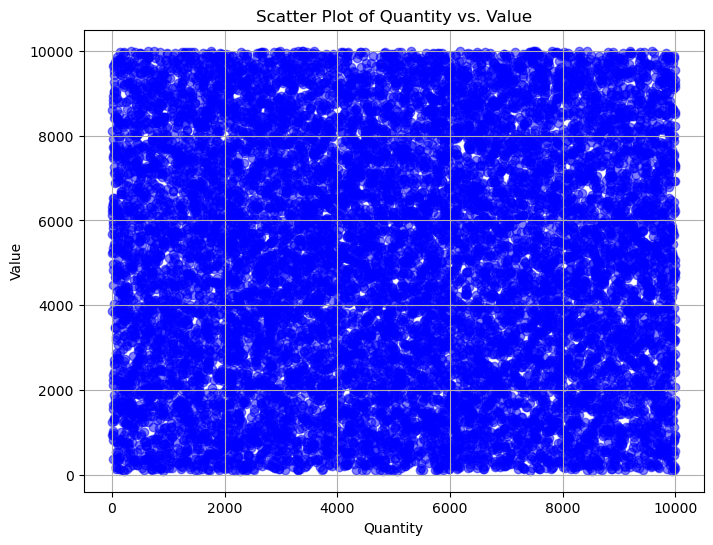

In [78]:
import matplotlib.pyplot as plt

# Scatter plot of two columns (e.g., Quantity vs. Value)
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Quantity vs. Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Columns in the DataFrame: Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')
'Date' was in the index. Resetting the index.


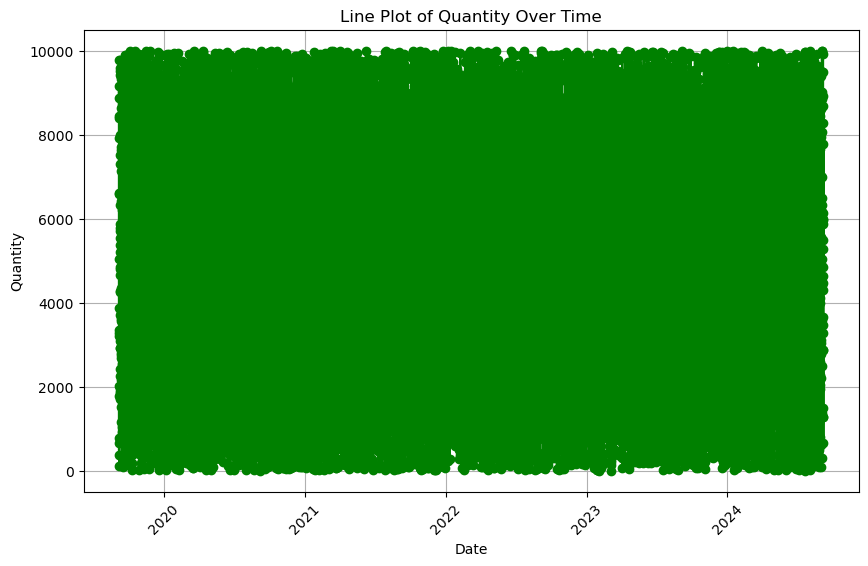

In [66]:
# Line plot of a time series (e.g., Date vs. Quantity)
import matplotlib.pyplot as plt

# Check the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# If 'Date' is in the index, reset the index to make it a column
if 'Date' not in df.columns and 'Date' in df.index.names:
    df.reset_index(inplace=True)
    print("'Date' was in the index. Resetting the index.")

# If 'Date' column has different name (e.g., 'date' or contains spaces), rename it
if 'Date' not in df.columns:
    for col in df.columns:
        if 'date' in col.lower():
            df.rename(columns={col: 'Date'}, inplace=True)
            print(f"Renaming column '{col}' to 'Date'.")

# Check if 'Date' exists after adjustments
if 'Date' in df.columns:
    # Plot the line graph using the 'Date' and 'Quantity' columns
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Quantity'], color='green', linestyle='-', marker='o')
    plt.title('Line Plot of Quantity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("The 'Date' column still does not exist. Please check your dataset.")

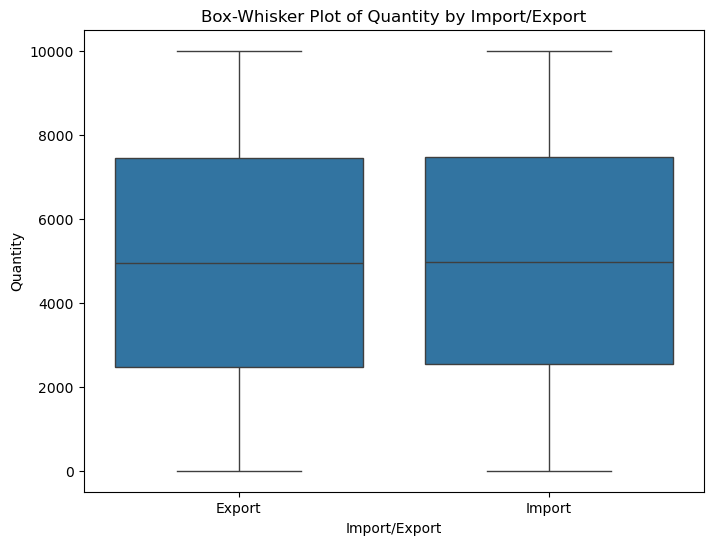

In [68]:
import seaborn as sns

# Box-Whisker plot for Quantity by some categorical variable (e.g., Import_Export)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Import_Export', y='Quantity', data=df)
plt.title('Box-Whisker Plot of Quantity by Import/Export')
plt.xlabel('Import/Export')
plt.ylabel('Quantity')
plt.show()

In [70]:
import scipy.stats as stats

# Example: Observed and expected frequencies
observed = df['Category'].value_counts().values  # Replace with your categorical column
expected = [len(df) / len(observed)] * len(observed)  # Uniform expected frequencies

# Perform Chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

Chi-Square Statistic: 4.676666666666667, P-value: 0.3221101687806341


In [72]:
# Mann-Whitney U Test (for comparing two independent groups in a non-categorical column)
for col in non_categorical_columns:
    for cat_col in categorical_columns:
        unique_groups = random_df[cat_col].dropna().unique()
        if len(unique_groups) == 2:
            group1 = random_df[random_df[cat_col] == unique_groups[0]][col].dropna()
            group2 = random_df[random_df[cat_col] == unique_groups[1]][col].dropna()
            stat, p_val = mannwhitneyu(group1, group2)
            print(f"Mann-Whitney U Test for {col} by {cat_col} - Statistic: {stat}, p-value: {p_val}")

Mann-Whitney U Test for Quantity by Import_Export - Statistic: 1112945.5, p-value: 0.5905797253837664
Mann-Whitney U Test for Value by Import_Export - Statistic: 1119825.5, p-value: 0.8040582356869617
Mann-Whitney U Test for Customs_Code by Import_Export - Statistic: 1137992.0, p-value: 0.6049270402581242
Mann-Whitney U Test for Weight by Import_Export - Statistic: 1095909.0, p-value: 0.20917002525884476
Mann-Whitney U Test for Invoice_Number by Import_Export - Statistic: 1102739.0, p-value: 0.3330143600877511


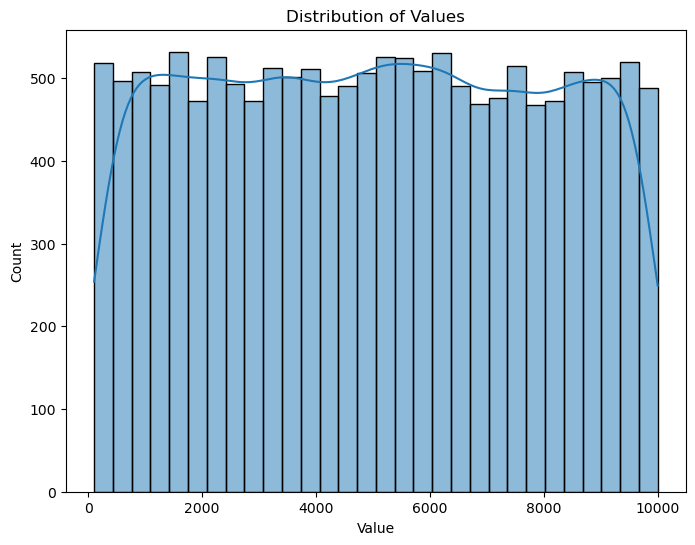

In [74]:
# Histogram of the 'Value' column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Value', bins=30, kde=True)
plt.title('Distribution of Values')
plt.show()

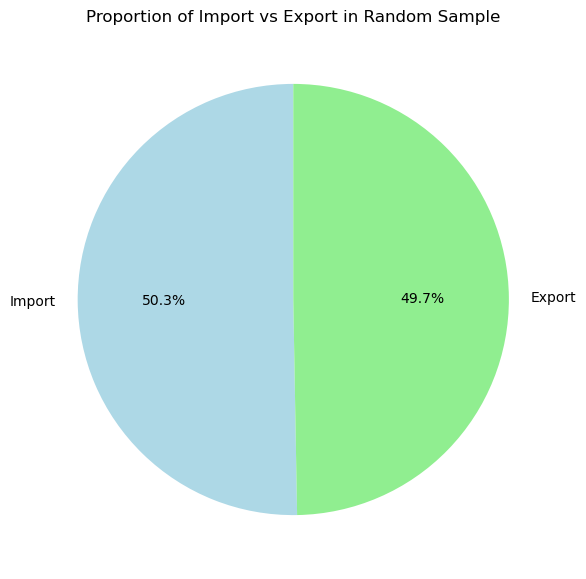

In [76]:
import matplotlib.pyplot as plt

# Select relevant categorical column 'Import_Export' to make a pie chart
import_export_counts = random_df['Import_Export'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(import_export_counts, labels=import_export_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Import vs Export in Random Sample')
plt.show()